In [1]:
import os, sys
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras import optimizers

os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


In [2]:
# 分類するクラス
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

nb_classes = len(classes)

img_width, img_height = 48, 48

In [3]:
result_dir = 'trainingResult'

test_data_dir = './data/test/'

In [4]:
def model_load():
    # VGG16, FC層は不要なので include_top=False
    input_tensor = Input(shape=(img_width, img_height, 3))
    vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

    # FC層の作成
    top_model = Sequential()
    top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(nb_classes, activation='softmax'))

    # VGG16とFC層を結合してモデルを作成
    model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

    # 学習済みの重みをロード
    model.load_weights(os.path.join(result_dir, 'finetuning-60.h5'))

    # 多クラス分類を指定
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

    return model

./data/test/happy_00.jpg
[('neutral', 0.99904674), ('sad', 0.00061064464)]


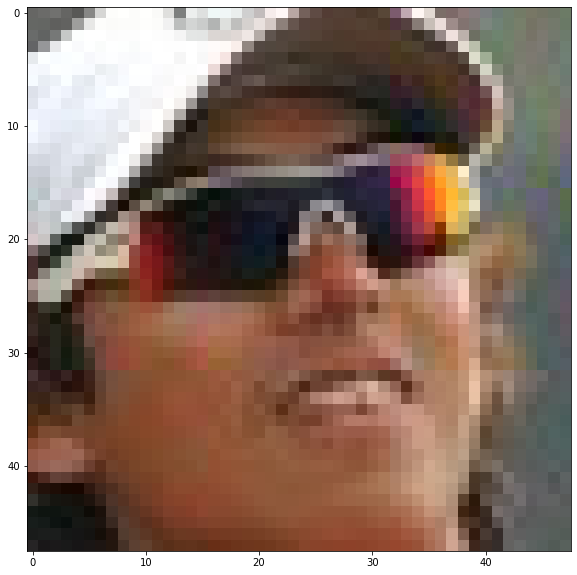

./data/test/surprise_01.jpg
[('fear', 0.81448597), ('sad', 0.13478059)]


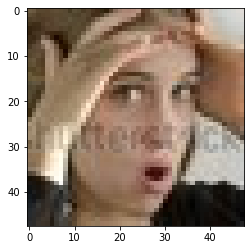

./data/test/surprise_00.jpg
[('happy', 0.99995065), ('disgust', 3.4480116e-05)]


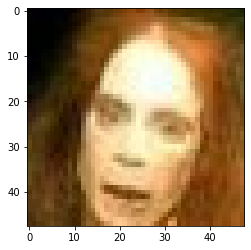

./data/test/happy_01.jpg
[('happy', 0.8904888), ('sad', 0.092135735)]


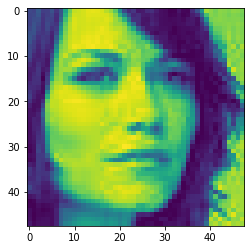

./data/test/happy_03.jpg
[('sad', 0.99049556), ('disgust', 0.009060978)]


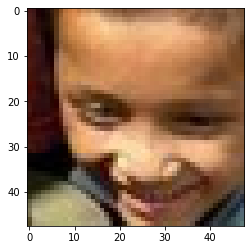

./data/test/surprise_02.jpg
[('neutral', 0.5499119), ('surprise', 0.15799658)]


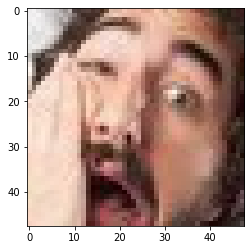

./data/test/surprise_03.jpg
[('sad', 0.9150655), ('angry', 0.030335205)]


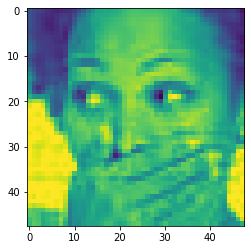

./data/test/happy_02.jpg
[('happy', 0.9752221), ('disgust', 0.015813174)]


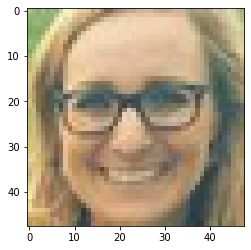

./data/test/happy_06.jpg
[('happy', 0.9884145), ('sad', 0.00859563)]


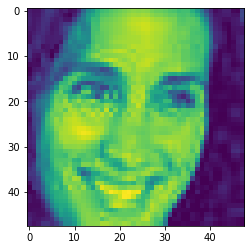

./data/test/angry_09.jpg
[('angry', 0.65227354), ('disgust', 0.31863204)]


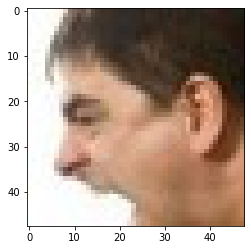

./data/test/surprise_07.jpg
[('happy', 0.9991736), ('angry', 0.00066709623)]


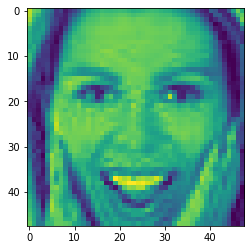

./data/test/surprise_06.jpg
[('angry', 0.51051265), ('fear', 0.34614325)]


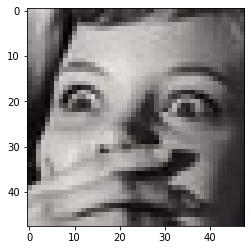

./data/test/angry_08.jpg
[('fear', 0.8884905), ('angry', 0.040877294)]


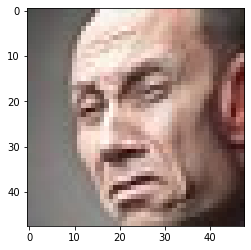

./data/test/happy_07.jpg
[('neutral', 0.7439523), ('sad', 0.22672433)]


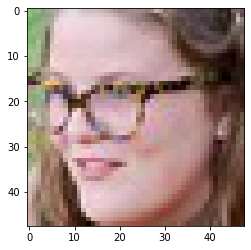

./data/test/happy_05.jpg
[('sad', 0.8684803), ('neutral', 0.09373027)]


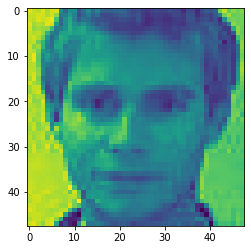

./data/test/disgust_08.jpg
[('fear', 0.88291734), ('sad', 0.06728998)]


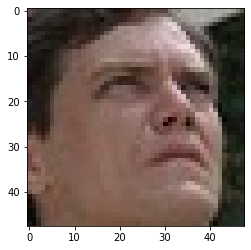

./data/test/surprise_04.jpg
[('angry', 0.6480115), ('sad', 0.30957848)]


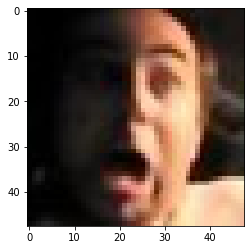

./data/test/surprise_05.jpg
[('fear', 0.49159473), ('surprise', 0.26674816)]


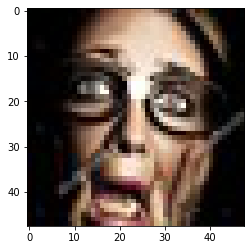

./data/test/disgust_09.jpg
[('neutral', 0.96151054), ('sad', 0.025900027)]


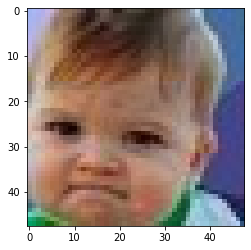

./data/test/happy_04.jpg
[('sad', 0.57748073), ('neutral', 0.41803232)]


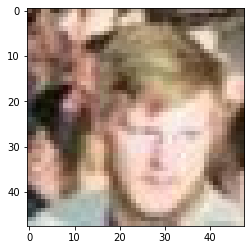

./data/test/sad_09.jpg
[('neutral', 0.6705804), ('angry', 0.16754353)]


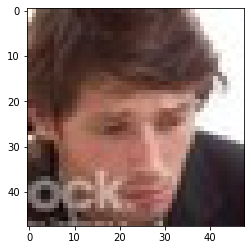

./data/test/sad_08.jpg
[('angry', 0.6729132), ('sad', 0.18728088)]


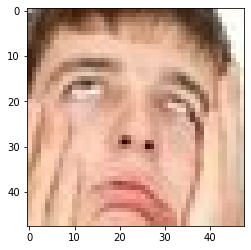

./data/test/fear_09.jpg
[('neutral', 0.83022755), ('sad', 0.07101661)]


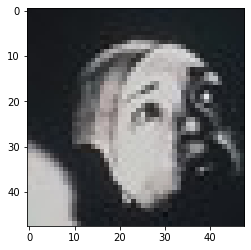

./data/test/neutral_08.jpg
[('neutral', 0.7879804), ('angry', 0.14344186)]


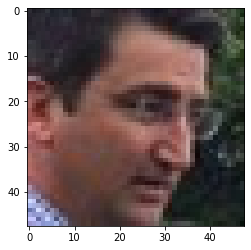

./data/test/neutral_09.jpg
[('disgust', 0.6159907), ('sad', 0.32070968)]


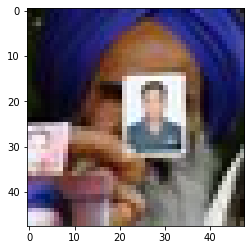

./data/test/fear_08.jpg
[('happy', 0.74561507), ('angry', 0.09467321)]


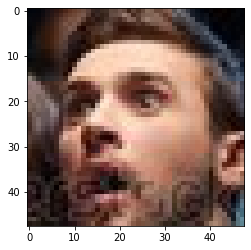

./data/test/fear_06.jpg
[('angry', 0.8637278), ('disgust', 0.06158542)]


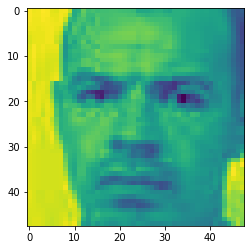

./data/test/sad_03.jpg
[('sad', 0.9388473), ('angry', 0.049002297)]


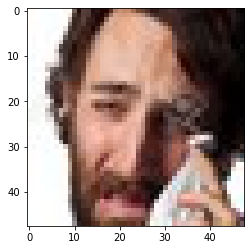

./data/test/neutral_07.jpg
[('sad', 0.9007687), ('happy', 0.09044362)]


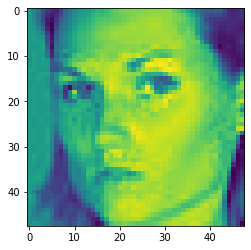

./data/test/sad_02.jpg
[('sad', 0.6322644), ('disgust', 0.13937329)]


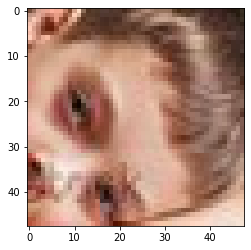

./data/test/neutral_06.jpg
[('fear', 0.44927928), ('neutral', 0.29407334)]


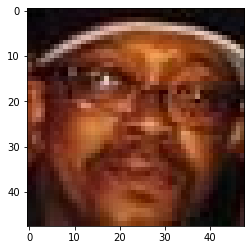

./data/test/fear_07.jpg
[('sad', 0.70843434), ('angry', 0.13008353)]


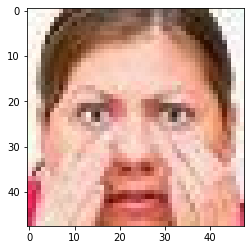

./data/test/fear_05.jpg
[('angry', 0.6619728), ('happy', 0.16834752)]


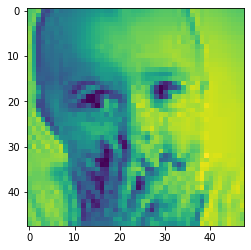

./data/test/neutral_04.jpg
[('neutral', 0.9796198), ('fear', 0.015838897)]


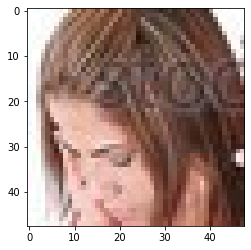

./data/test/sad_00.jpg
[('fear', 0.62135226), ('angry', 0.1959511)]


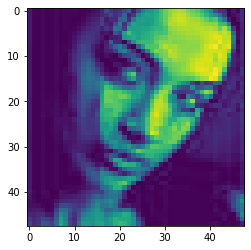

./data/test/neutral_05.jpg
[('sad', 0.95113313), ('disgust', 0.016448027)]


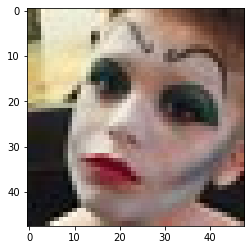

./data/test/sad_01.jpg
[('disgust', 0.5848375), ('sad', 0.37741747)]


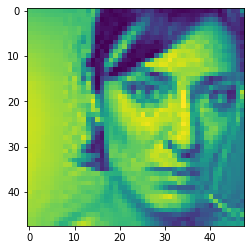

./data/test/fear_04.jpg
[('sad', 0.982811), ('surprise', 0.011275271)]


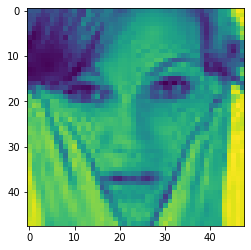

./data/test/fear_00.jpg
[('fear', 0.4852441), ('surprise', 0.47849825)]


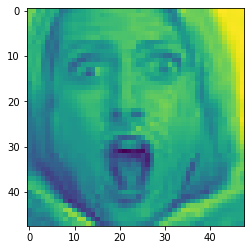

./data/test/sad_05.jpg
[('fear', 0.53642887), ('sad', 0.43524858)]


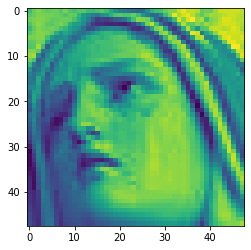

./data/test/neutral_01.jpg
[('happy', 0.96944934), ('neutral', 0.02925762)]


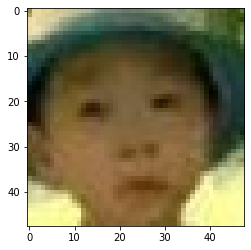

./data/test/sad_04.jpg
[('sad', 0.9553727), ('neutral', 0.028182102)]


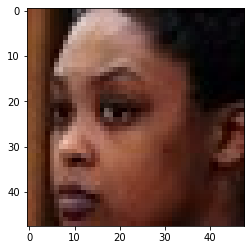

./data/test/neutral_00.jpg
[('neutral', 0.44114488), ('sad', 0.23180845)]


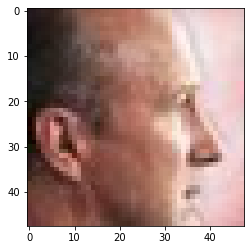

./data/test/fear_01.jpg
[('happy', 0.5325602), ('angry', 0.19176501)]


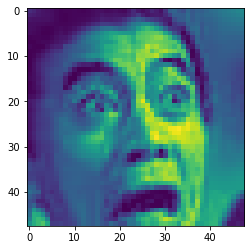

./data/test/fear_03.jpg
[('sad', 0.56968945), ('happy', 0.17661417)]


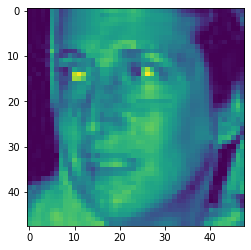

./data/test/neutral_02.jpg
[('sad', 0.8351753), ('neutral', 0.16301697)]


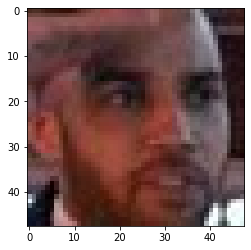

./data/test/sad_06.jpg
[('angry', 0.5599259), ('neutral', 0.3251784)]


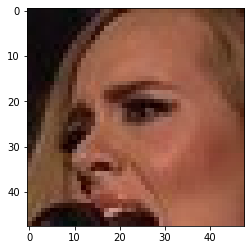

./data/test/neutral_03.jpg
[('neutral', 0.32457867), ('fear', 0.2931755)]


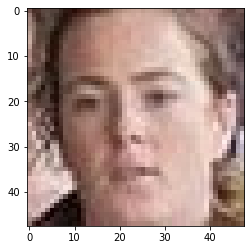

./data/test/sad_07.jpg
[('sad', 0.5383008), ('fear', 0.36964425)]


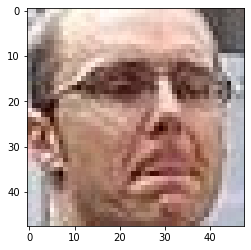

./data/test/fear_02.jpg
[('happy', 0.53371465), ('sad', 0.43883872)]


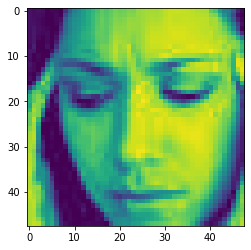

./data/test/happy_09.jpg
[('neutral', 0.9998807), ('angry', 6.3929154e-05)]


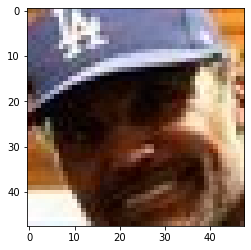

./data/test/angry_06.jpg
[('sad', 0.51644486), ('angry', 0.44521725)]


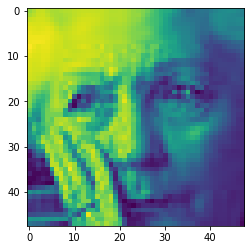

./data/test/disgust_04.jpg
[('fear', 0.96545035), ('sad', 0.021327483)]


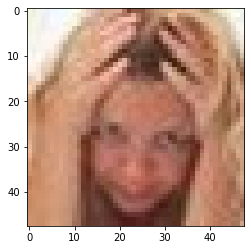

./data/test/surprise_08.jpg
[('angry', 0.95143473), ('surprise', 0.023449214)]


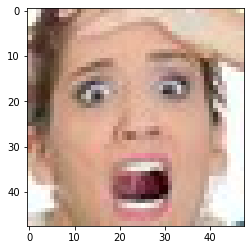

./data/test/surprise_09.jpg
[('surprise', 0.41309726), ('happy', 0.38461325)]


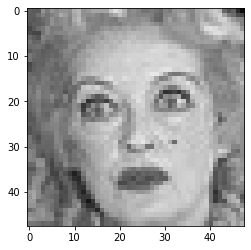

./data/test/angry_07.jpg
[('angry', 0.99897814), ('disgust', 0.00066282705)]


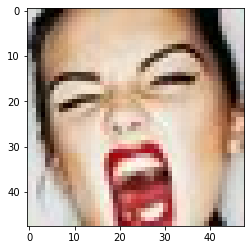

./data/test/disgust_05.jpg
[('sad', 0.33797345), ('neutral', 0.30444795)]


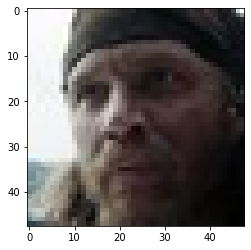

./data/test/happy_08.jpg
[('happy', 0.95487094), ('neutral', 0.0223389)]


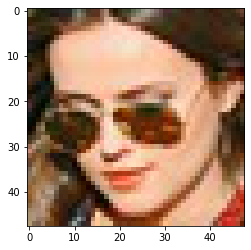

./data/test/disgust_07.jpg
[('happy', 0.80973697), ('sad', 0.18915167)]


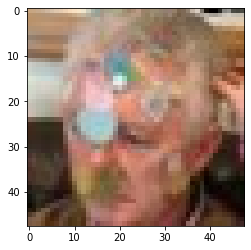

./data/test/angry_05.jpg
[('sad', 0.9708825), ('happy', 0.014896613)]


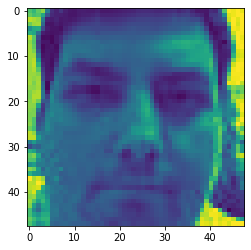

./data/test/disgust_06.jpg
[('angry', 0.8286196), ('sad', 0.08774631)]


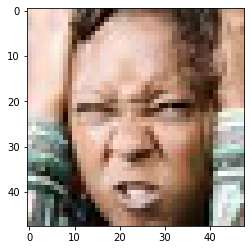

./data/test/angry_04.jpg
[('sad', 0.45896572), ('happy', 0.18002972)]


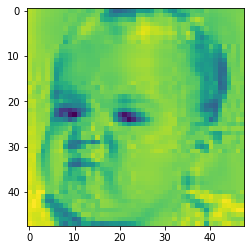

./data/test/angry_00.jpg
[('angry', 0.38458788), ('happy', 0.34789383)]


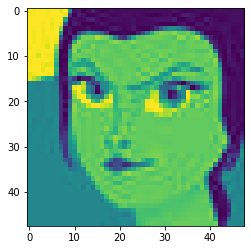

./data/test/disgust_02.jpg
[('sad', 0.90152115), ('disgust', 0.05623655)]


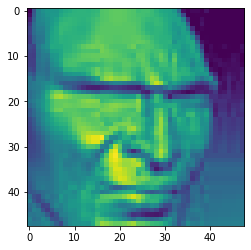

./data/test/angry_01.jpg
[('happy', 0.7285719), ('neutral', 0.18396388)]


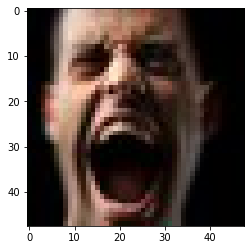

./data/test/disgust_03.jpg
[('happy', 0.99325174), ('sad', 0.004593892)]


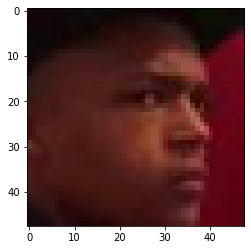

./data/test/disgust_01.jpg
[('disgust', 0.6052249), ('sad', 0.3945021)]


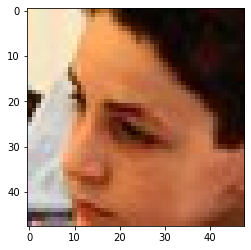

./data/test/angry_03.jpg
[('sad', 0.758537), ('happy', 0.18648013)]


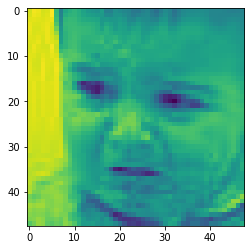

./data/test/disgust_00.jpg
[('neutral', 0.9643377), ('angry', 0.015214192)]


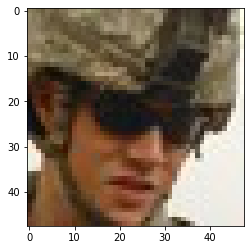

./data/test/angry_02.jpg
[('fear', 0.8997578), ('angry', 0.038588893)]


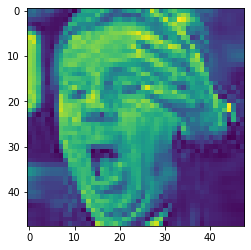

In [5]:
# モデルのロード
model = model_load()

# テスト用画像取得
test_imagelist = os.listdir(test_data_dir)

# .DS_Storeの削除
test_imagelist = [filename for filename in os.listdir(test_data_dir) if not filename.startswith('.')]

%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
 
fig = plt.figure(figsize=(10, 10)) # 10 x 10の画像表示域を確保

correct_answer = 0
count = 0
correct_dict = {}
for test_image in test_imagelist:
    filename = os.path.join(test_data_dir, test_image)
    
    
    img = image.load_img(filename, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 学習時に正規化してるので、ここでも正規化
    x = x / 255
    pred = model.predict(x)[0]
    
    # 予測確率が高いトップを出力
    # 今回は最も似ているクラスのみ出力したいので1にしているが、上位n個を表示させることも可能。
    top = 2
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    
    im = Image.open(filename)
    #画像をarrayに変換
    im_list = np.asarray(im)
    #貼り付け
    plt.imshow(im_list)
    print(filename)
    print(result)

    if filename.split('/')[3].split('_')[0] == result[0][0]:
        label = result[0][0]
        correct_answer += 1
        if label not in correct_dict:
            correct_dict[label] = 1
        else:
            correct_dict[label] += 1 
    
    #表示
    plt.show()
    count += 1
    print('=======================================')

In [6]:
rate = correct_answer / count
print(correct_answer)
print(rate)

18
0.2571428571428571


In [7]:
print(correct_dict)

{'happy': 4, 'angry': 3, 'neutral': 4, 'sad': 4, 'fear': 1, 'surprise': 1, 'disgust': 1}
